# Beta-Binomial model - Bayes' billiard - Estimating a probability

# _Josep Fortiana_  $\hspace{5cm}$   2022-03-14

****
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\diag{\operatorname{diag}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\invgammadist{\operatorname{InvGamma}}$
$\def\invwishartdist{\operatorname{InvWishart}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\newcommand{\KL}[2]{\operatorname{KL}(\mkern2mu#1\mkern2mu\mathrel\mid\mathrel{\mkern-8mu}\mid\mkern2mu#2\mkern2mu)}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\Normaldist{\operatorname{MNormal}}$
$\def\cP{\cal P}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{\operatorname{Prob}}$
$\def\R{\mathbb{R}}$ 
$\def\stilde{\tilde{s}}$ 
$\def\sqtilde{\tilde{s}{}^{2}}$ 
$\def\tdist{\operatorname{t}}$
$\def\u{\mathbb{1}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

# Model description

A plain Beta-Bernoulli model as in the Bayes' billiard problem. 

Learn about an unknown probability  $\theta$ from an independent sequence of $n$ Bernoulli experiments $Y_{1},\dots,Y_{n}$ iid $\sim\operatorname{Bern}(\theta)$, in $n_{1}$ of which the $1$ value was observed.

# JAGS solution

## 01. Install JAGS

There are three programs implementing the BUGS language (BUGS='Bayesian Analysis Using Gibbs Sampling')

Generally we use JAGS (preferable due to its straightforward R interface)

JAGS is a standalone program, designed to be called by R, with data set from R; then its output is imported back into R.

We will use WinBUGS/OpenBUGS only occasionally. 

WinBUGS and OpenBUGS are standalone programs with a graphic user interface. It is also possible to invoke them from R. 
You can install them and read the documentation.

On Windows I put all three in a `C:/BUGS` folder.

A nice feature of both OpenBUGS and WinBUGS is DoodleBUGS, a tool to draw DAG's (Directed Acyclic Graphs) to represent statistical models. Then the BUGS program can be generated from the program.

## 02. Install R packages to interact with JAGS (and OpenBUGS and/or WinBUGS)

Run the following from the RStudio console or the R console

Additionally, 'runjags' needs to know JAGS' location. On Windows I had to set the environment variable:
```
JAGS_ROOT=C:\BUGS\JAGS-4.3.0
```
otherwise it gives a compilation error and does not install.

## 03. Load packages needed to interact with JAGS

In [1]:
require(R2jags)

Loading required package: R2jags

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




## 04. Using JAGS 

### 04.01. Data (known, fixed quantities). Stored as an R list object.

$n$ Bernoulli experiments, in $n_{1}$ of which a $1$ has been observed.

Parameters and observed variables are defined here, as well as their functional (`=`) or random (`~`) dependencies. 

The Data list must contain values for constants, eventually _hyperparameters_ such as $a$, $b$, and observed values for the model variables.

In [2]:
n<-50
n1<-15

In [3]:
a<-2         # Beta(a,b) prior
b<-5         #

We can enter either     
Version 01: $y = $ sequence of 0's and 1's, or   
Version 02: $x =$ absolute frequency of 1's

In [4]:
y <- c(rep(1,n1),rep(0,n-n1))

Data for the JAGS program, to be used below

In [5]:
billiard1.dat<-list(a=a,b=b,n=n,y=y)

In [6]:
billiard2.dat<-list(a=a,b=b,n=n,x=n1)

### 04.02. Model: prior, likelihood, 

(and whatever posterior quantity we desire to simulate)

Write program in the BUGS language, with the model description (likelihood + prior).

Store it to an external file with an appropriate extension `.jag` (this is arbitrary)

#### Version 01: `y` is observed

In [7]:
cat(
"model
    {
    for (i in 1:n){
         y[i]~dbern(theta)
         }                     # likelihood
    theta~dbeta(a,b)           # prior
    }"
    ,file="billiard1.jag")

#### Version 02: `x` is observed

In [8]:
cat(
"model
    {
    x~dbin(theta,n)            # Binomial likelihood. See arguments order!
    theta~dbeta(a,b)           # prior
    }"
    ,file="billiard2.jag")

### 04.03 Run JAGS

In [9]:
billiard.m1<-jags(data=billiard1.dat, n.chains=3,n.iter=3000,n.burnin=500, 
        parameters.to.save=c("theta"), model.file="billiard1.jag")

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 50
   Unobserved stochastic nodes: 1
   Total graph size: 54

Initializing model



In [10]:
billiard.m2<-jags(data=billiard2.dat, n.chains=3,n.iter=3000,n.burnin=500, 
        parameters.to.save=c("theta"), model.file="billiard2.jag")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model



## Extract and use simulation results

The `print()` method for the resulting object in the `jags` class shows summary statistics for the required parameter `theta` (as well as the `deviance` quantity).

In [11]:
print(billiard.m1)

Inference for Bugs model at "billiard1.jag", fit using jags,
 3 chains, each with 3000 iterations (first 500 discarded), n.thin = 2
 n.sims = 3750 iterations saved
         mu.vect sd.vect   2.5%    25%    50%    75%  97.5%  Rhat n.eff
theta      0.299   0.059  0.191  0.258  0.296  0.337  0.421 1.001  3800
deviance  61.944   1.228 61.088 61.179 61.471 62.201 65.500 1.001  3800

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 0.8 and DIC = 62.7
DIC is an estimate of expected predictive error (lower deviance is better).


In [12]:
print(billiard.m2)

Inference for Bugs model at "billiard2.jag", fit using jags,
 3 chains, each with 3000 iterations (first 500 discarded), n.thin = 2
 n.sims = 3750 iterations saved
         mu.vect sd.vect  2.5%   25%   50%   75% 97.5%  Rhat n.eff
theta      0.299   0.061 0.187 0.255 0.296 0.339 0.423 1.001  2300
deviance   5.120   1.292 4.203 4.306 4.626 5.421 8.771 1.001  3800

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 0.8 and DIC = 6.0
DIC is an estimate of expected predictive error (lower deviance is better).


See the structure of the output

In [ ]:
#str(billiard.m1)

In [ ]:
#str(billiard.m1$BUGSoutput)

In [13]:
str(billiard.m1$BUGSoutput$summary)

 num [1:2, 1:9] 61.944 0.299 1.228 0.059 61.088 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:2] "deviance" "theta"
  ..$ : chr [1:9] "mean" "sd" "2.5%" "25%" ...


### Medians and (by default)  80 % credible intervals

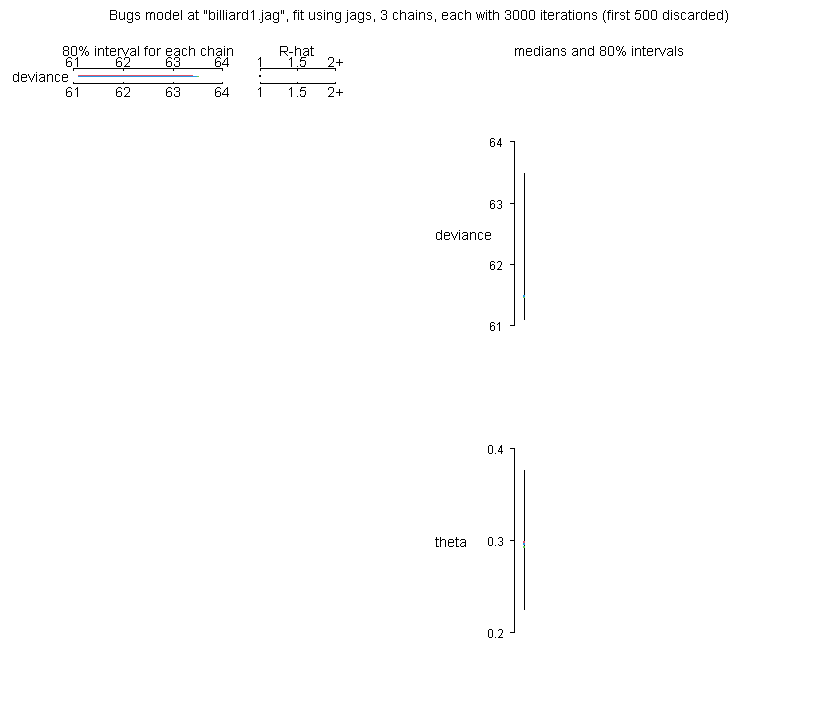

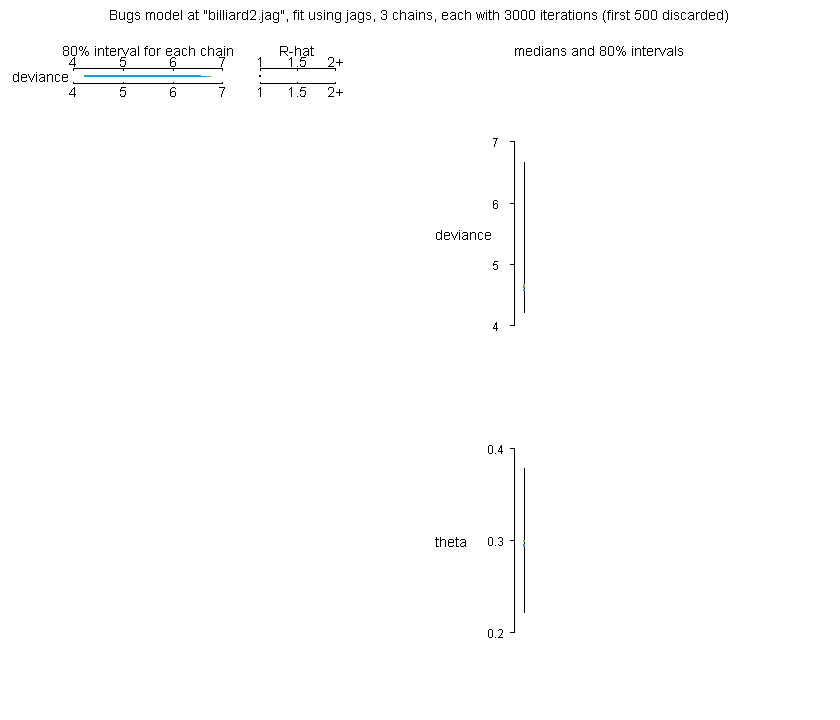

In [14]:
options(repr.plot.with=12,repr.plot.height=6)
par(mfrow=c(1,2))
plot(billiard.m1)
plot(billiard.m2)

### Traceplot

To assess stationarity of the chain

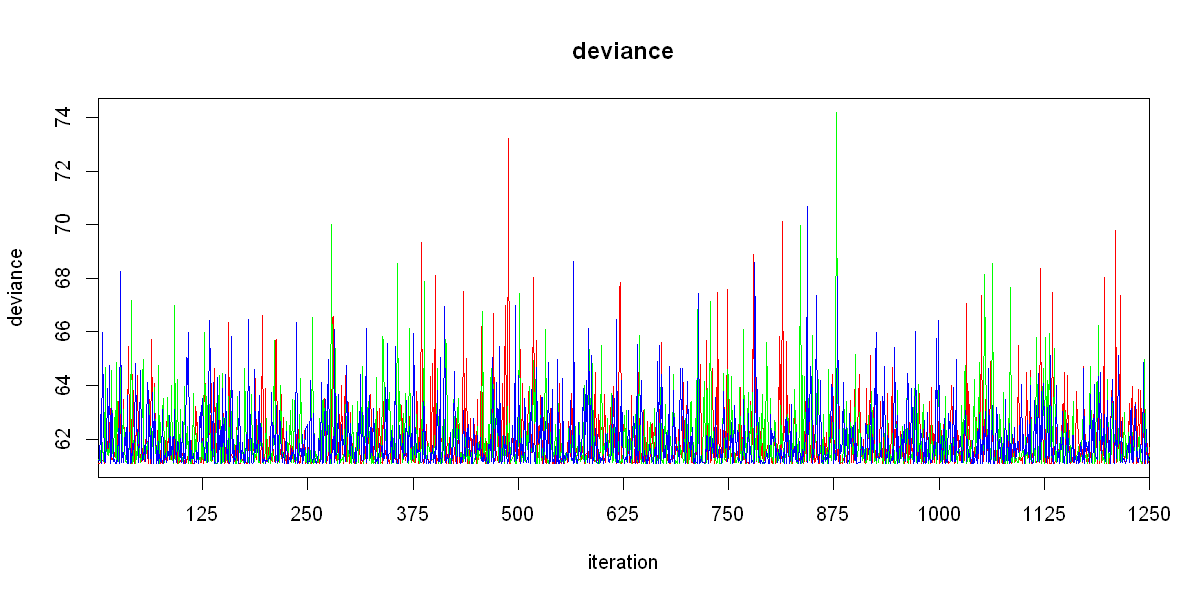

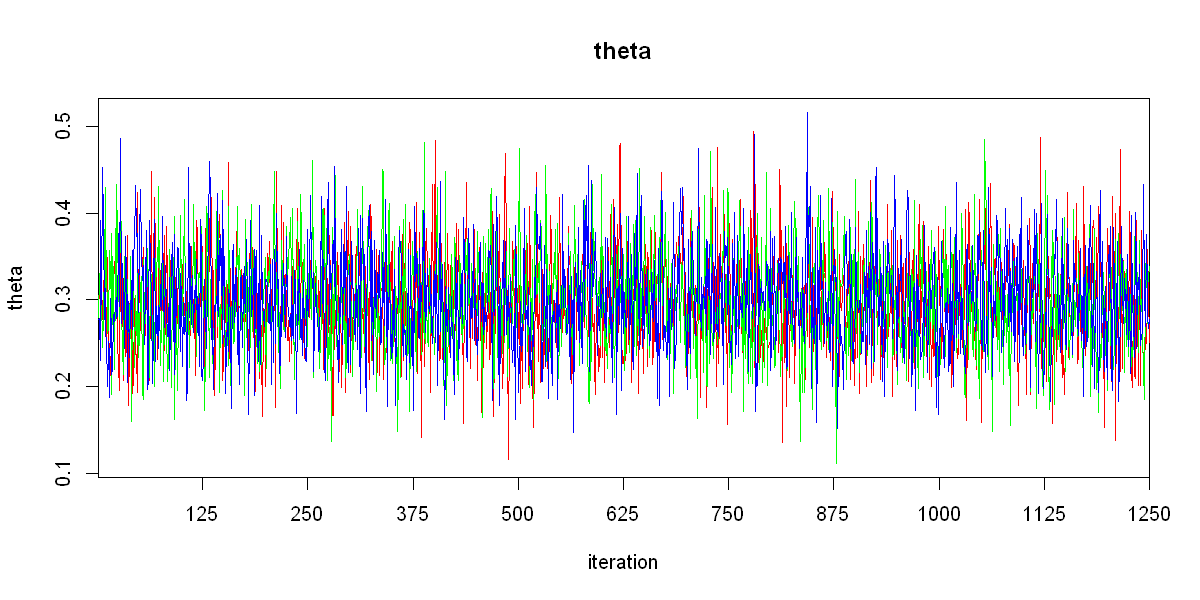

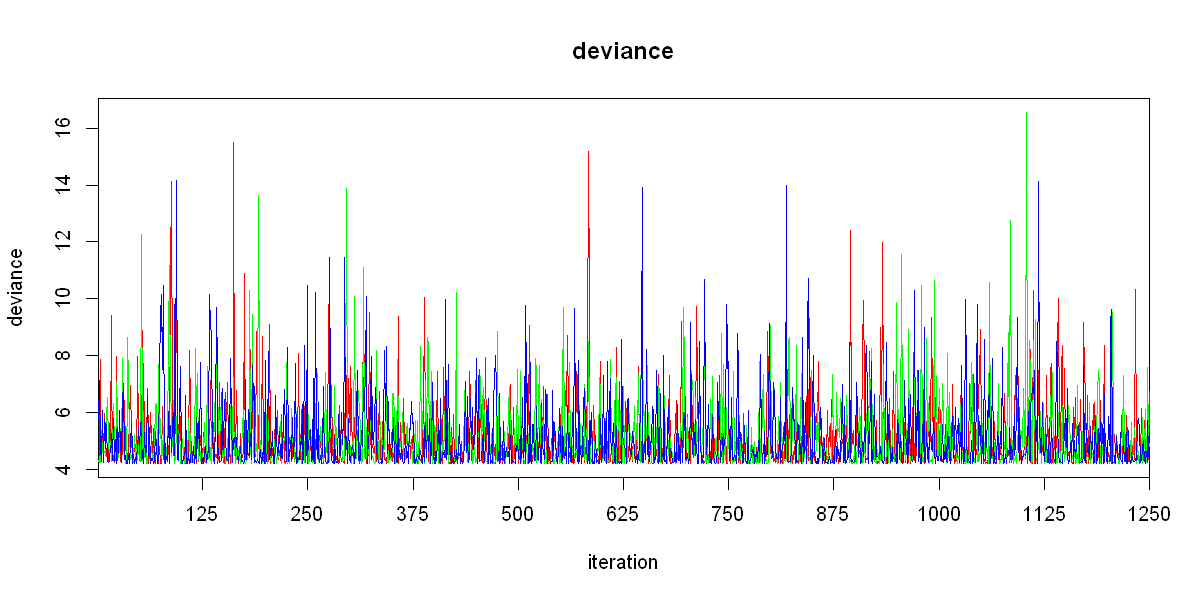

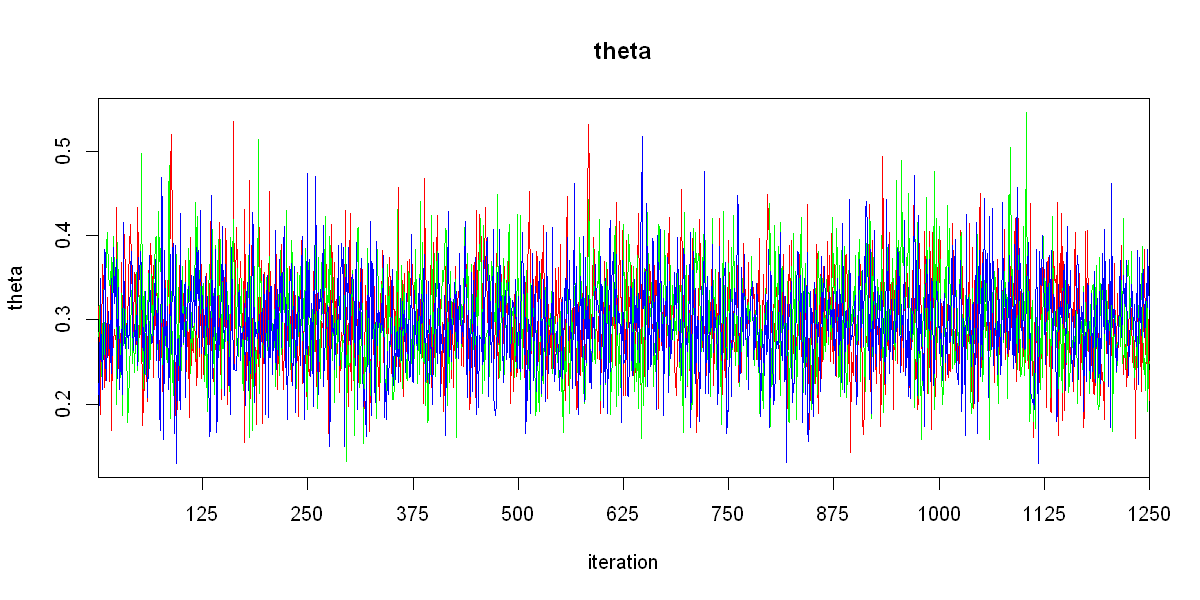

In [15]:
options(repr.plot.width=10,repr.plot.height=5)
traceplot(billiard.m1)
traceplot(billiard.m2)

### Density plot

Plot "by hand" an estimate of the posterior $\theta$ distribution, from the sample generated by JAGS

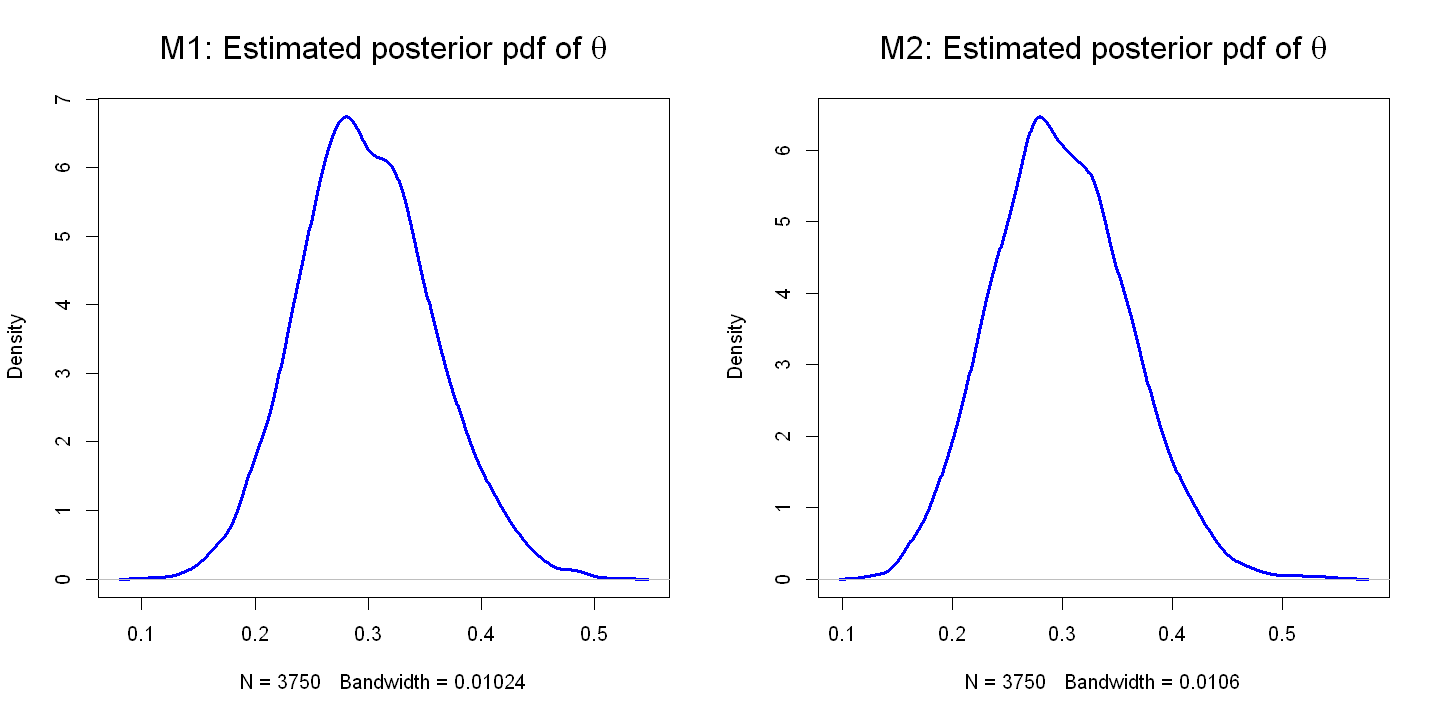

In [16]:
options(repr.plot.width=12,repr.plot.height=6)
theta.sample1<-billiard.m1$BUGSoutput$sims.list$theta
theta.sample1.density<-density(theta.sample1)
theta.sample2<-billiard.m2$BUGSoutput$sims.list$theta
theta.sample2.density<-density(theta.sample2)
par(mfrow=c(1,2))
plot(theta.sample1.density,lwd=2.5,col="blue",main=expression(paste("M1: Estimated posterior pdf of ",theta)),cex.main=1.6)
plot(theta.sample2.density,lwd=2.5,col="blue",main=expression(paste("M2: Estimated posterior pdf of ",theta)),cex.main=1.6)

### Posterior expectation and variance

In [17]:
Post.Expectation1<-mean(theta.sample1)
Post.Variance1<-var(theta.sample1)
Post.Expectation2<-mean(theta.sample2)
Post.Variance2<-var(theta.sample2)

cat(sprintf("\nPosterior expectation = %6.3f (M1).", round(Post.Expectation1,4)))
cat(sprintf("\nPosterior variance    = %6.3f (M1).", round(Post.Variance1,4)))

cat(sprintf("\nPosterior expectation = %6.3f (M2).", round(Post.Expectation2,4)))
cat(sprintf("\nPosterior variance    = %6.3f.(M2)", round(Post.Variance2,4)))


Posterior expectation =  0.299 (M1).
Posterior variance    =  0.004 (M1).
Posterior expectation =  0.299 (M2).
Posterior variance    =  0.004.(M2)

### Maximum A Posteriori (MAP) estimate of $\theta$

In [18]:
#
# See help of the 'density()' function
#
Theta.MAP1<-theta.sample1.density$x[which.max(theta.sample1.density$y)]
Theta.MAP2<-theta.sample2.density$x[which.max(theta.sample2.density$y)]
cat(sprintf("\nMAP estimate = %6.3f (M1)", round(Theta.MAP1,4)))
cat(sprintf("\nMAP estimate = %6.3f (M2)", round(Theta.MAP2,4)))


MAP estimate =  0.280 (M1)
MAP estimate =  0.280 (M2)

### Posterior credible intervals

The Bayesian concept of _credible interval_ has not the intrinsic conceptual incoherence of frequentist _confidence intervals (C.I.)._ 

In the frequentist framework a parameter $\theta$ is a non random quantity, and a C.I. for $\theta$ with confidence coefficient $\gamma\in(0,1)$ (usually $\gamma=0.90$ or $\gamma=0.95$) is a pair of r.v. $A(X)$, $B(X)$, functions of the random sample $X$, such that:

$$
    \operatorname{Prob}\big(A(X)\leq \theta \leq B(X)\big) \geq \gamma.
$$

When we evaluate $X$ as the actually observed sample $x$, we get the two numbers $a=A(x)$ and $b=B(x)$. We tend to believe that with probability $\geq\gamma$ the $[a,b]\subset\mathbb{R}$ interval contains $\theta$, which is a FALSEHOOD. After a calm reflection, we must agree that either $\gamma\in[a,b]$ or $\gamma\notin[a,b]$. We do not know and will never know which one is true. Remember, in the frequentist framework $\theta$ is a constant, therefore an expression such as:

$$
    \tag{$\star$}
    \operatorname{Prob}\big(a\leq \theta \leq b\big)\geq\gamma
$$

is MEANINGLESS: nothing random there. The frequentist interpretation is, of course, that a large number $n$ of
independent realizations of the experiment should give intervals $(a_{j},b_{j})$, $1\leq j\leq n$, and we expect that a proportion $\geq\gamma$ of them will contain $\theta$ (but, again, this cannot be ascertained).

For the billiard problem there any interval $(a,b)\subset[0,1]$ satisfying $(\star)$ could be a Credible Interval. 

#### (1) Symmetric interval around the MAP estimate

A possible credible interval is the one centered on the MAP estimate, an interval of the form:

$$
    (\mbox{MAP}-t,\mbox{MAP}+t),
$$

where the half-width $t$ is determined by the condition that the proportion of samples in the interval is $\geq\gamma$.

In [19]:
gamma<-0.90
#
# Proportion of sample within (MAP-t,MAP+t) minus gamma as a function of t. Locate root of function.
#
Sim.gamma<-function(t){sum((Theta.MAP1-t<=theta.sample1)&(theta.sample1<=Theta.MAP1+t))/length(theta.sample1)-gamma}
G.t<-uniroot(Sim.gamma,c(0,0.5))
Half.width.01<-G.t$root
round(Half.width.01,4)

[1] 0.102

We should see to it that the interval does not overstep the support boundaries, which is, in principle, possible with this construction.

In [20]:
Credible.Interval.01<-c(max(0,Theta.MAP1-Half.width.01),min(1,Theta.MAP1+Half.width.01))
cat(sprintf("Credible interval 01 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.01[1],4),round(Credible.Interval.01[2],4)))

Credible interval 01 (90.00 %): (0.1784, 0.3824)

In [ ]:
Width.01<-diff(Credible.Interval.01)
# 2*Half.width
round(Width.01,4)

#### (2) Central $(1-\gamma)$ probability interval

Another possible determination is the credible interval symmetrically placed in probabilities, leaving out 
a $(1-\gamma)/2$ probability on both sides.

In [21]:
gamma<-0.90
delta<-(1-gamma)/2
Credible.Interval.02<-as.numeric(quantile(theta.sample1,c(delta,1-delta)))
cat(sprintf("Credible interval 02 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.02[1],4),round(Credible.Interval.02[2],4)))

Credible interval 02 (90.00 %): (0.2045, 0.4006)

In [22]:
width.02<-diff(Credible.Interval.02)
round(width.02,4)

[1] 0.1961

In general a narrower credible interval is better. According to this criterion the Highest Posterior Density (HPD) credible interval (Credible interval 03 below) is optimal. Solutions 01 and 02 are acceptable, being easier to compute if the distribution is not too asymmetrical. With a more symmetrical distribution the three options tend to agree.

#### (3) HPD credible interval

We determine it by intersecting the empirical pdf with a moving horizontal line.

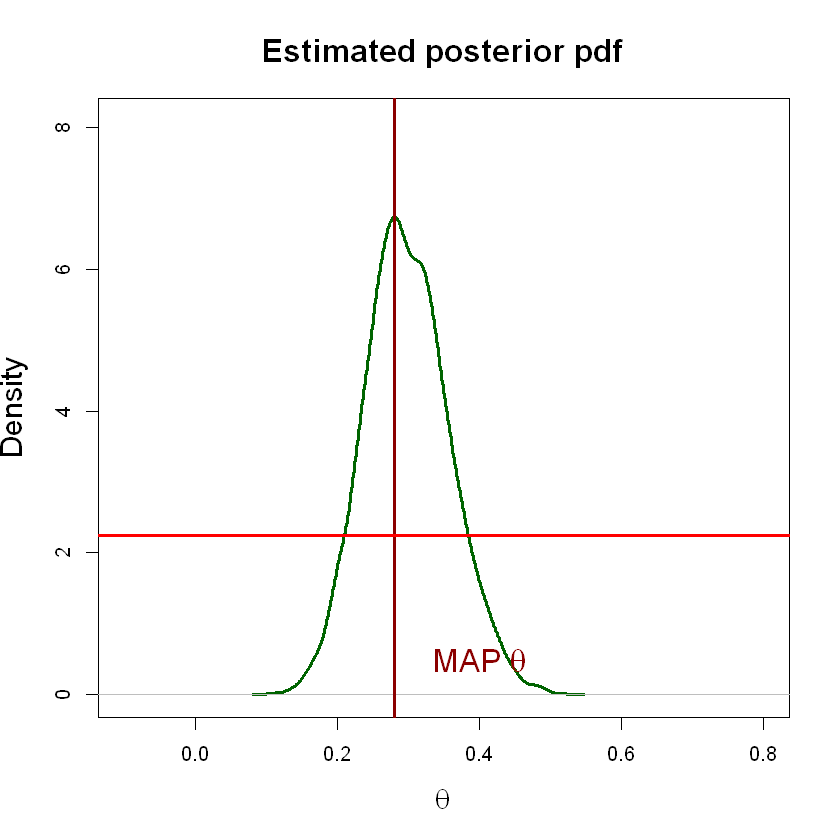

In [23]:
options(repr.plot.width=7,repr.plot.height=7)
u<-seq(0,1,length=1000)
theta.sample1.density<-density(theta.sample1)
Theta.MAP1<-theta.sample1.density$x[which.max(theta.sample1.density$y)]
y.max<-max(theta.sample1.density$y)
plot(theta.sample1.density,type="l",lwd=2.5,col="DarkGreen",xlim=c(-0.1,0.8),
     xlab=expression(theta),ylim=c(0,y.max*1.2),main="Estimated posterior pdf",cex.lab=1.5,cex.main=1.6)
# Find whether the legend should go on the left or on the right (a clumsy piece of code)
legx<-ifelse(n1/n<0.5,n1/n+0.1,n1/n-0.1)
abline(v=Theta.MAP1,col="DarkRed",lwd=3)
text(legx,0.5,expression(paste("MAP ",theta)),col="DarkRed",cex=1.6)
d<-4.5                                 # some arbitrary height to plot 
abline(h=y.max-d,lwd=2.5,col="red")

In [24]:
gamma<-0.90
y.max<-max(theta.sample1.density$y)
Sim.gamma.3<-function(s){
    CI.thetas<-(theta.sample1.density$x)[which(theta.sample1.density$y>=(y.max-s))]
    return(sum((min(CI.thetas)<=theta.sample1)&(theta.sample1<=max(CI.thetas)))/length(theta.sample1)-gamma)
    }
G.s<-uniroot(Sim.gamma.3,c(0,y.max))
Sim.s<-G.s$root
round(Sim.s,4)

[1] 4.9748

In [25]:
# find interval bounds
CI.thetas<-(theta.sample1.density$x)[which(theta.sample1.density$y>=Sim.s)]
Credible.Interval.03<-c(min(CI.thetas),max(CI.thetas))
cat(sprintf("Credible interval 03 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.03[1],4),round(Credible.Interval.03[2],4)))

Credible interval 03 (90.00 %): (0.2475, 0.3398)

In [26]:
width.03<-diff(Credible.Interval.03)
round(width.03,4)

[1] 0.0923

This is the optimal CI in the sense of having the minimum length.

### Cast output as an object in the `mcmc` class, 

To be able to enter it to additional diagnostic (in the `coda` package) and plotting functions.

In [27]:
billiard.m1.mcmc<-as.mcmc(billiard.m1)
str(billiard.m1.mcmc)

List of 3
 $ : 'mcmc' num [1:1250, 1:2] 61.1 61.1 61.1 61.2 61.2 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "deviance" "theta"
  ..- attr(*, "mcpar")= num [1:3] 501 2999 2
 $ : 'mcmc' num [1:1250, 1:2] 61.2 61.3 61.2 61.6 61.1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "deviance" "theta"
  ..- attr(*, "mcpar")= num [1:3] 501 2999 2
 $ : 'mcmc' num [1:1250, 1:2] 61.2 61.2 62.4 62.9 61.1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "deviance" "theta"
  ..- attr(*, "mcpar")= num [1:3] 501 2999 2
 - attr(*, "class")= chr "mcmc.list"


In [28]:
summary(billiard.m1.mcmc)


Iterations = 501:2999
Thinning interval = 2 
Number of chains = 3 
Sample size per chain = 1250 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean      SD  Naive SE Time-series SE
deviance 61.9441 1.22794 0.0200521      0.0200558
theta     0.2986 0.05899 0.0009633      0.0009465

2. Quantiles for each variable:

            2.5%     25%     50%     75%   97.5%
deviance 61.0876 61.1787 61.4715 62.2014 65.4997
theta     0.1909  0.2578  0.2955  0.3369  0.4207


In [29]:
#install.packages("lattice",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(lattice)

Loading required package: lattice



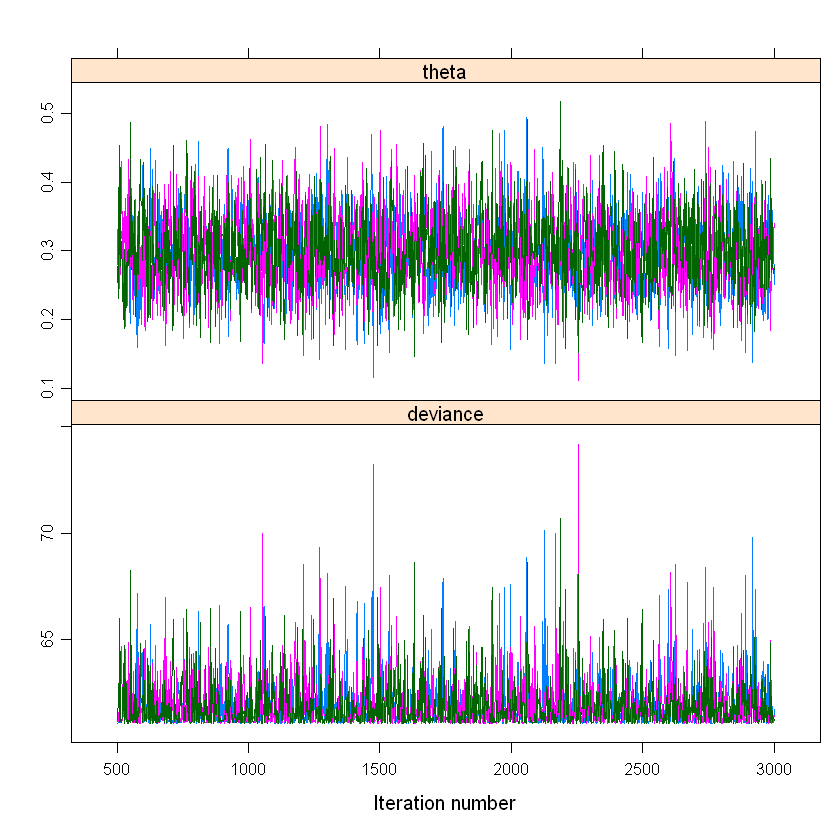

In [30]:
xyplot(billiard.m1.mcmc)

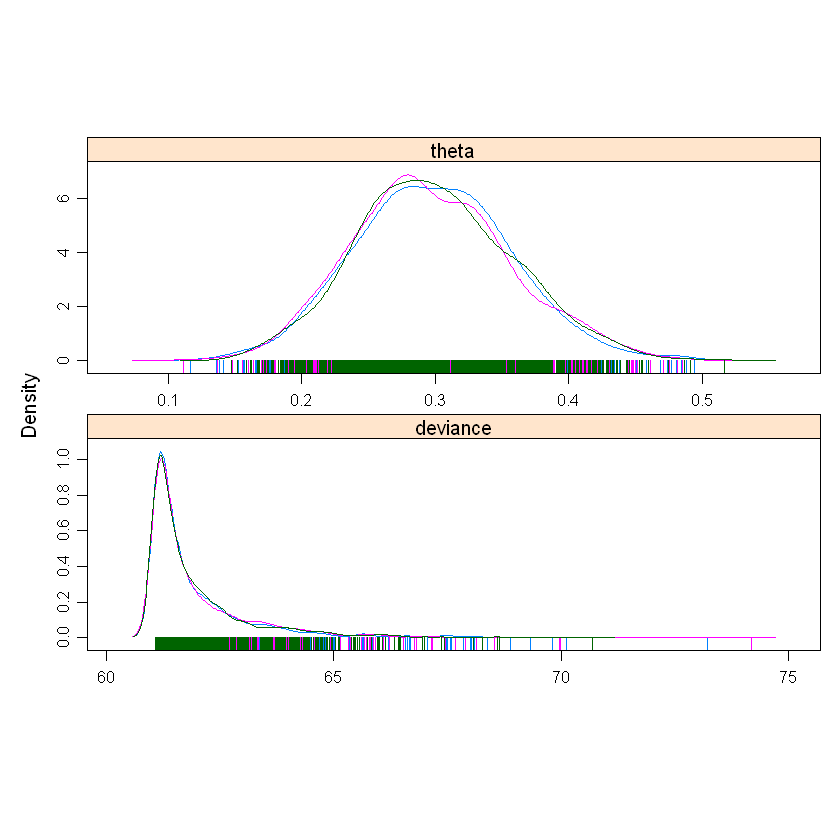

In [31]:
densityplot(billiard.m1.mcmc)

# Posterior predictive simulation

A new experiment is performed, `New_n` trials, in which we will register the number `n1_PostPred` of ones.

The posterior predictive distribution is that of `n1_PostPred`, given the previously observed `n1` successes out of `n`trials.

We can enter just `n1`  instead of the full `y` vector.

In [32]:
New_n<-40 
billiard2PostPred.dat<-list(a=a,b=b,n=n,n1=n1,New_n=New_n)

In [33]:
cat(
"model
    {
    n1~dbin(theta,n)              # Binomial likelihood. See arguments order!
    theta~dbeta(a,b)              # prior
    n1_PostPred~dbin(theta,New_n) # Posterior predictive
    }"
    ,file="billiard2PostPred.jag")

In [34]:
billiard.m2PostPred<-jags(data=billiard2PostPred.dat, n.chains=3,n.iter=3000,n.burnin=500, 
        parameters.to.save=c("n1_PostPred"), model.file="billiard2PostPred.jag")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model



### Convert to an `mcmc`  object for further diagnostics

In [35]:
billiard.m2PostPred.mcmc<-as.mcmc(billiard.m2PostPred)
summary(billiard.m2PostPred.mcmc)


Iterations = 501:2999
Thinning interval = 2 
Number of chains = 3 
Sample size per chain = 1250 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean    SD Naive SE Time-series SE
deviance     5.117 1.288  0.02103        0.02407
n1_PostPred 11.951 3.768  0.06154        0.06608

2. Quantiles for each variable:

             2.5%   25%    50%    75%  97.5%
deviance    4.203 4.297  4.615  5.409  8.861
n1_PostPred 5.000 9.000 12.000 14.000 20.000


In [36]:
str(billiard.m2PostPred.mcmc)

List of 3
 $ : 'mcmc' num [1:1250, 1:2] 8.19 4.77 9.05 7.05 7.19 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "deviance" "n1_PostPred"
  ..- attr(*, "mcpar")= num [1:3] 501 2999 2
 $ : 'mcmc' num [1:1250, 1:2] 5.1 6.19 4.25 4.26 4.22 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "deviance" "n1_PostPred"
  ..- attr(*, "mcpar")= num [1:3] 501 2999 2
 $ : 'mcmc' num [1:1250, 1:2] 4.58 7.04 8 5.38 4.9 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "deviance" "n1_PostPred"
  ..- attr(*, "mcpar")= num [1:3] 501 2999 2
 - attr(*, "class")= chr "mcmc.list"


Concatenate generated sequences of `n1_PostPred` in the three chains

In [37]:
n1_PostPred<-c(as.numeric(billiard.m2PostPred.mcmc[[1]][,2]),as.numeric(billiard.m2PostPred.mcmc[[2]][,2]),as.numeric(billiard.m2PostPred.mcmc[[3]][,2]))
str(n1_PostPred)

 num [1:3750] 16 15 13 10 18 17 14 9 12 11 ...


#### R language quirk:  (just as in the prior predictive above)

I would like to use `table()` to obtain the absolute, then relative frequencies in this sequence.

The output of `table()` omits bins with 0 frequency.

Thus I will not be able to compare it with the theoretical probabilities.

In [38]:
T_PostPred.0<-table(n1_PostPred)
str(T_PostPred.0)
T_PostPred.0

 'table' int [1:26(1d)] 3 21 24 65 139 183 261 302 355 426 ...
 - attr(*, "dimnames")=List of 1
  ..$ n1_PostPred: chr [1:26] "2" "3" "4" "5" ...


n1_PostPred
  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21 
  3  21  24  65 139 183 261 302 355 426 396 356 320 246 211 146 104  75  54  34 
 22  23  24  25  26  30 
 14   6   5   2   1   1 

#### R language quirk (continued):

If I could be sure that all zeros appear at the end of the sequence I could append tem by hand.

A better alternative is to use `tabulate()`, which lists all frequencies for each of the `nbins` I specify.

Still, `tabulate()` requires **positive integers** hence I must increaseby one `n1_PriorPred` before calling it.

In [39]:
T_PostPred<-tabulate(n1_PostPred+1,nbins=New_n+1)
#str(T_PostPred)
#T_PostPred

In [40]:
length(T_PostPred)
sum(T_PostPred)

[1] 41

[1] 3750

In [41]:
# Table of relative frequencies (proportions)
f_PostPred<-as.numeric(T_PostPred/sum(T_PostPred))
#round(f_PostPred,3)
#str(f_PostPred)

### Compare the sampled simulated posterior predictive pmf and the theoretical one

From the theory, it is known that in a model with Binomial likelihood $X\sim\binomdist (n\,|\,\theta)$, Beta prior $\theta\sim\betadist(a,b)$, 
given the observed $n_{1}$ successes (or 1's, or ball on the right of the cue ball, etc.) out of $n$ trials, the posterior pdf of $\theta$,
$\theta\CondTo n_{1}\sim\betadist(a',b')$,  where $a'=a+n_{1}$, $b'=b+n-n_{1}$.

Now if we want to predict the output of a new batch of $n^{\text{New}}$ trials, the posterior predictive distribution
for the resulting number of successes is a Beta-Binomial:

$$
    \big(n_{1}^{\text{PostPred}}\CondTo n_{1}\big)\mskip10mu\sim\mskip10mu\betabinomdist(n^{\text{New}},a',b')
    \mskip10mu=\mskip10mu\betabinomdist(n^{\text{New}},a+n_{1},b+n-n_{1})
$$

In [42]:
#install.packages("extraDistr",dependencies=TRUE,repos= "https://cloud.r-project.org")
require("extraDistr")

Loading required package: extraDistr



In [43]:
# Beta-Binomial probabilities, to be compared to the above relative frequencies
x.vals<-0:New_n
g<-dbbinom(x.vals,size=New_n,alpha=a+n1,beta=b+n-n1)
#round(g,3)
#str(g)

In [44]:
# For a uniform prior both vectors approach the probabilities of a discrete uniform distribution
yfg<-cbind(f_PostPred,g)
#round(t(yfg),3)

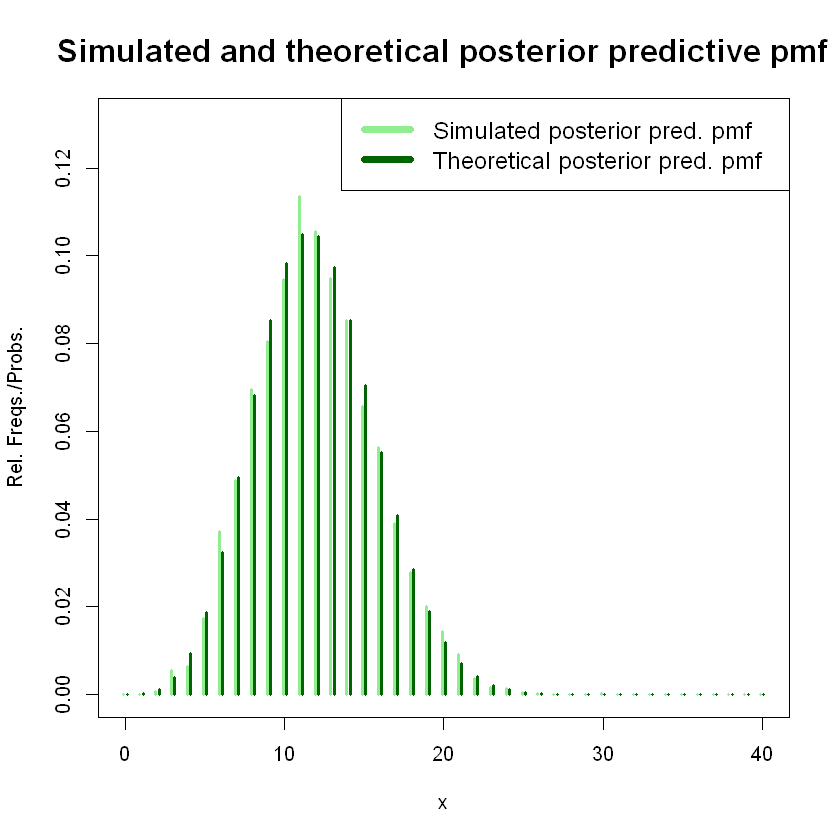

In [45]:
options(repr.plot.width=7,repr.plot.height=7)
y.max<-max(yfg)*1.15
matplot(x=cbind(x.vals-0.1,x.vals+0.1),y=yfg,type="h",lwd=3, lty=1,col=c("LightGreen","DarkGreen"),
        ylim=c(0,y.max),xlab="x",ylab="Rel. Freqs./Probs.",
        main="Simulated and theoretical posterior predictive pmf",cex.main=1.6)
legend("topright",legend=c("Simulated posterior pred. pmf","Theoretical posterior pred. pmf"),
       lwd=6, lty=1,cex=1.2,col=c("LightGreen","DarkGreen"))

# Prior predictive simulation

The following code does not work: trying to run JAGS with no data results in error.

```
billiard2PriorPred.dat<-list(a=a,b=b,n=n,n1_PriorPred=NA)
cat(
"model
    {
    n1_PriorPred~dbin(theta,n)            # Binomial likelihood. See arguments order!
    theta~dbeta(a,b)           # prior
    }"
    ,file="billiard2PriorPred.jag")
billiard.m2PriorPred<-jags(data=billiard2PriorPred.dat, n.chains=3,n.iter=3000,n.burnin=500, 
        parameters.to.save=c("n1_PriorPred"), model.file="billiard2PriorPred.jag")
```

A possible workaround is to devise an appropriate fake dataset and deceive JAGS telling it that our prior predictive is in fact a posterior predictive pdf.

To do this we recall that in a model with Binomial likelihood $X\sim\binomdist (n_0\,|\,\theta)$, Beta prior $\theta\sim\betadist(a_0,b_0)$, 
given the observed $n_{01}$ successes out of $n_{0}$ trials, the posterior pdf of $\theta$,
$\theta\CondTo n_{01}\sim\betadist(a,b)$,  where $a=a_{0}+n_{01}$, $b=b_{0}+n_{0}-n_{01}$.

Then we set, for instance: $n_{01}=1$, $n_{0}-n_{01}=1$, then  $n_{0}=n_{01}+1=2$, $a_{0}=a-n_{01}=a-1$, $b_{0}=b-(n_{0}-n_{01})=b-1$

In [ ]:
n0<-2
n01<-1
a0<-a-n01
b0<-b-(n0-n01)
n0
n01
a0
b0

Then proceed as above.